# Validate community benchmark
Last modification: 2024.02.08.</br>

# Inititate

In [1]:
import numpy as np
from seas_tools import SEAS
import myplots
import matplotlib.pylab as plt
plt.rcParams['font.size'] = '15'

mp = myplots.Figpref()
yr2sec = 365*24*60*60
stloc = None

bp_ver = 6
scheme = 'qd'
mode = 's'
full_ver_name = 'bp%d-%s-%s'%(bp_ver,scheme,mode)

if mode == 'a':
    hf = 100
elif mode == 's':
    hf = 50
mine = SEAS('yun',full_ver_name,'k',hf)
dalzilio = SEAS('dalzilio',full_ver_name,mp.mypink,10)
kim = SEAS('kim',full_ver_name,mp.mygreen,10)
ozawa = SEAS('ozawa',full_ver_name,mp.myblue,10)
romanet = SEAS('romanet',full_ver_name,mp.myviolet,10)

if mode == 'a':
    marcum = SEAS('marcum',full_ver_name,mp.myorange,100)
    scenario_list = [mine,marcum,romanet,ozawa,kim,dalzilio]
else:
    scenario_list = [mine,romanet,ozawa,kim,dalzilio]
    
# hf500 = SEAS('yun',full_ver_name,mp.mypink,500,label='dz = 500 m')
# hf350 = SEAS('yun',full_ver_name,mp.myyellow,350,label='dz = 350 m')
# hf300 = SEAS('yun',full_ver_name,mp.mygreen,300,label='dz = 300 m')
# hf250 = SEAS('yun',full_ver_name,mp.myblue,250,label='dz = 250 m')
# hf100 = SEAS('yun',full_ver_name,mp.mylavender,100,label='dz = 100 m')
# ozawa = SEAS('ozawa',full_ver_name,'k',10)
# scenario_list = [hf500,hf350,hf300,hf250,hf100,ozawa]
    
# noBC = SEAS('test',full_ver_name,'k',300,label='No BC',my_output_dir='A_noBC_hf300m')
# fsBC = SEAS('test',full_ver_name,mp.myblue,300,label='Free surface BC',my_output_dir='A_wFS_hf300m')
# noneBC = SEAS('test',full_ver_name,mp.mypink,300,label='None BC',my_output_dir='A_wNone_hf300m')
# mixBC = SEAS('test',full_ver_name,mp.mygreen,300,label='Mixed BC',my_output_dir='A_mixBC_hf300m')
# dcBC = SEAS('test',full_ver_name,mp.myyellow,300,label='Dirichlet BC',my_output_dir='A_wDC_hf300m')
# scenario_list = [noBC,fsBC,noneBC,mixBC,dcBC]

# Read outputs

## On-fault outputs

In [ ]:
stloc = 2.5e3
template = mine.onfault_suffix(stloc)

mine.read_onfault_at_depth(stloc)
dalzilio.read_onfault_at_depth(stloc)
ozawa.read_onfault_at_depth(stloc)
kim.read_onfault_at_depth(stloc)
romanet.read_onfault_at_depth(stloc)
if mode == 'a': marcum.read_onfault_at_depth(stloc)

# noBC.read_onfault_at_depth(stloc)
# fsBC.read_onfault_at_depth(stloc)
# noneBC.read_onfault_at_depth(stloc)

In [2]:
for stloc in [-1.5,0.,0.5,1.,1.5,2.5,3.5,5.0,7.5]:
    # dcBC.read_onfault_at_depth(stloc*1e3)
    # print(len(dcBC.t))
    mine.read_onfault_at_depth(stloc*1e3)
    print(len(mine.t))

No existing data file - write it


No existing darcy_velocity data - compute it
Save data... Saved!
11317
No existing data file - write it
Load existing darcy_velocity data
Saved!
11317
No existing data file - write it
Load existing darcy_velocity data
Saved!
11317
No existing data file - write it
Load existing darcy_velocity data
Saved!
11317
No existing data file - write it
Load existing darcy_velocity data
Saved!
11317
No existing data file - write it
Load existing darcy_velocity data
Saved!
11317
No existing data file - write it
Load existing darcy_velocity data
Saved!
11317
No existing data file - write it
Load existing darcy_velocity data
Saved!
11317
No existing data file - write it
Load existing darcy_velocity data
Saved!
11317


## Global output

In [3]:
dalzilio.read_global_outputs()
ozawa.read_global_outputs()
kim.read_global_outputs()
romanet.read_global_outputs()
if mode == 'a': marcum.read_global_outputs()
mine.read_global_outputs()

Load /export/dump/jyun/BP6/comparison/dalzilio_S_10m/global.dat
Load /export/dump/jyun/BP6/comparison/ozawa_S_10m/global.dat
Load /export/dump/jyun/BP6/comparison/kim_S_10m/global.dat
Load /export/dump/jyun/BP6/comparison/romanet_S_10m/global.dat
No existing data file - write it


Saved!


## Save evolution outputs

In [4]:
# -- Process raw data if it's first time loading the result
if mine.bpNum == 6:
    for target_var in ['slip','shear_stress','normal_stress','darcy_vel']:
        mine.save_evolution_BP6(target_var,save_on=True,new_fname=None)

Saved!
Saved!
Saved!
Load existing darcy_velocity data
Saved!


# Plot on-fault outputs

## All on-fault ouptputs

In [ ]:
save_on = 0
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(40,15))
noBC.line_plot_macro(ax[0,0],stloc,scenario_list,'slip',root_label='ozawa')
noBC.line_plot_macro(ax[0,1],stloc,scenario_list,'slip_rate',root_label='ozawa')
noBC.line_plot_macro(ax[0,2],stloc,scenario_list,'shear_stress',root_label='ozawa')
noBC.line_plot_macro(ax[1,0],stloc,scenario_list,'pore_pressure',root_label='ozawa')
noBC.line_plot_macro(ax[1,1],stloc,scenario_list,'darcy_vel',root_label='ozawa')
noBC.line_plot_macro(ax[1,2],stloc,scenario_list,'state',root_label='ozawa')
# mine.line_plot_macro(ax[0,0],stloc,scenario_list,'slip')
# mine.line_plot_macro(ax[0,1],stloc,scenario_list,'slip_rate')
# mine.line_plot_macro(ax[0,2],stloc,scenario_list,'shear_stress')
# mine.line_plot_macro(ax[1,0],stloc,scenario_list,'pore_pressure')
# mine.line_plot_macro(ax[1,1],stloc,scenario_list,'darcy_vel')
# mine.line_plot_macro(ax[1,2],stloc,scenario_list,'state')
plt.tight_layout()
# if save_on: plt.savefig('%s/all_onfault_outputs_%s.png'%(mine.my_output_dir,template[-7:]))
plt.show()

## All global outputs

In [ ]:
save_on = 0
fig,ax=plt.subplots(nrows=2,figsize=(12,15))
mine.line_plot_macro(ax[0],None,scenario_list,'max_slip_rate')
mine.line_plot_macro(ax[1],None,scenario_list,'moment_rate')
plt.tight_layout()
if save_on: plt.savefig('%s/all_global_outputs.png'%(mine.my_output_dir),dpi=300)
plt.show()

## Individual variable

In [ ]:
save_on = 0
fig,ax=plt.subplots(figsize=(12,6))
# target_var = 'slip'
target_var = 'slip_rate'
# target_var = 'shear_stress'
# target_var = 'normal_stress'
# target_var = 'pore_pressure'
# target_var = 'darcy_vel'
# target_var = 'state'
# target_var = 'max_slip_rate'
# target_var = 'moment_rate'
# mine.line_plot_macro(ax,stloc,scenario_list,target_var)
noBC.line_plot_macro(ax,stloc,[ozawa,noBC],target_var,root_label='ozawa')
plt.tight_layout()
# if save_on: 
#     if target_var == 'max_slip_rate' or target_var == 'moment_rate':
#         plt.savefig('%s/%s.png'%(mine.my_output_dir,target_var),dpi=300)
#     else:
#         plt.savefig('%s/%s_at_%s.png'%(mine.my_output_dir,target_var,template[-7:]),dpi=300)
# else:
#     if target_var == 'max_slip_rate' or target_var == 'moment_rate':
#         print('%s/%s.png'%(mine.my_output_dir,target_var))
#     else:
#         print('%s/%s_at_%s.png'%(mine.my_output_dir,target_var,template[-7:]))
plt.show()

## Inidividual on-fault variable, every station

Load /export/dump/jyun/BP6/comparison/yun_S_50m/fltst_strk-15.dat
Load /export/dump/jyun/BP6/comparison/dalzilio_S_10m/fltst_strk-15.dat
Load /export/dump/jyun/BP6/comparison/ozawa_S_10m/fltst_strk-15.dat
Load /export/dump/jyun/BP6/comparison/kim_S_10m/fltst_strk-15.dat
Load /export/dump/jyun/BP6/comparison/romanet_S_10m/fltst_strk-15.dat
Load /export/dump/jyun/BP6/comparison/yun_S_50m/fltst_strk+00.dat
Load /export/dump/jyun/BP6/comparison/dalzilio_S_10m/fltst_strk+00.dat
Load /export/dump/jyun/BP6/comparison/ozawa_S_10m/fltst_strk+00.dat
Load /export/dump/jyun/BP6/comparison/kim_S_10m/fltst_strk+00.dat
Load /export/dump/jyun/BP6/comparison/romanet_S_10m/fltst_strk+00.dat


Load /export/dump/jyun/BP6/comparison/yun_S_50m/fltst_strk+10.dat
Load /export/dump/jyun/BP6/comparison/dalzilio_S_10m/fltst_strk+10.dat
Load /export/dump/jyun/BP6/comparison/ozawa_S_10m/fltst_strk+10.dat
Load /export/dump/jyun/BP6/comparison/kim_S_10m/fltst_strk+10.dat
Load /export/dump/jyun/BP6/comparison/romanet_S_10m/fltst_strk+10.dat
Load /export/dump/jyun/BP6/comparison/yun_S_50m/fltst_strk+35.dat
Load /export/dump/jyun/BP6/comparison/dalzilio_S_10m/fltst_strk+35.dat
Load /export/dump/jyun/BP6/comparison/ozawa_S_10m/fltst_strk+35.dat
Load /export/dump/jyun/BP6/comparison/kim_S_10m/fltst_strk+35.dat
Load /export/dump/jyun/BP6/comparison/romanet_S_10m/fltst_strk+35.dat
Load /export/dump/jyun/BP6/comparison/yun_S_50m/fltst_strk+75.dat
Load /export/dump/jyun/BP6/comparison/dalzilio_S_10m/fltst_strk+75.dat
Load /export/dump/jyun/BP6/comparison/ozawa_S_10m/fltst_strk+75.dat
Load /export/dump/jyun/BP6/comparison/kim_S_10m/fltst_strk+75.dat
Load /export/dump/jyun/BP6/comparison/romanet_S

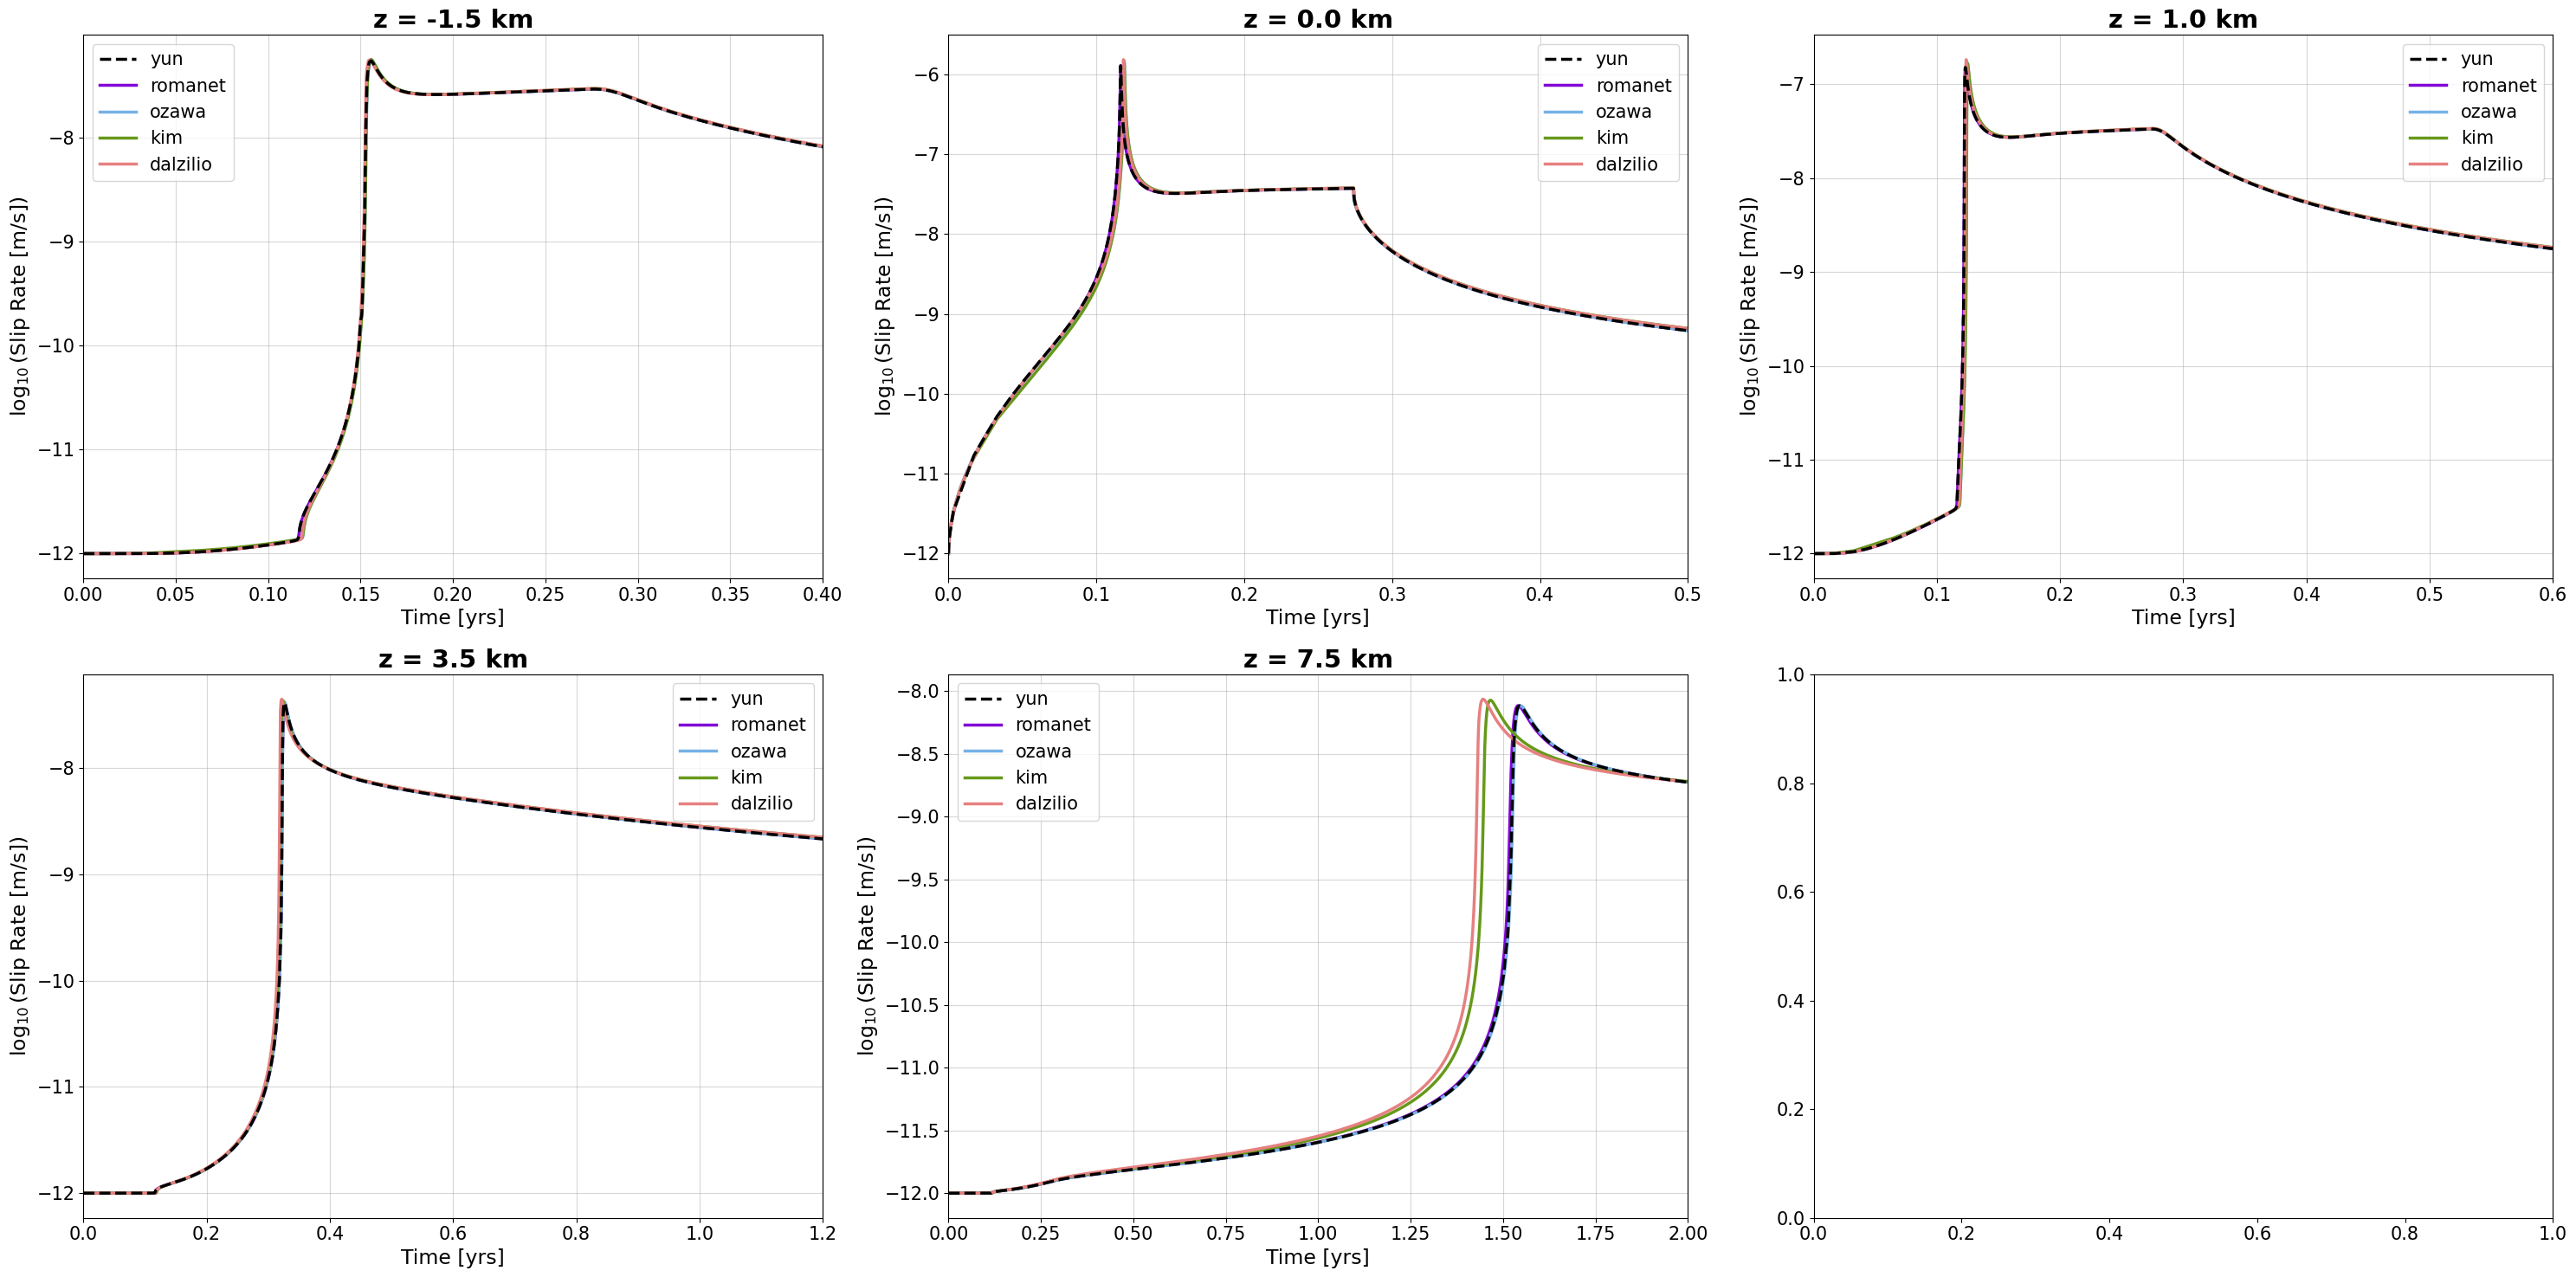

In [9]:
save_on = 1
if bp_ver == 6:
    # ncol,nrow = 2,2
    # ncol,nrow = 3,3
    ncol,nrow = 3,2
fig,ax=plt.subplots(ncols=ncol,nrows=nrow,figsize=(30,15))
# fig,ax=plt.subplots(ncols=ncol,nrows=nrow,figsize=(20,15))
# fig,ax=plt.subplots(ncols=ncol,nrows=nrow,figsize=(30,22.5))
# target_var = 'slip'
target_var = 'slip_rate'
# target_var = 'shear_stress'
# target_var = 'normal_stress'
# target_var = 'pore_pressure'
# target_var = 'darcy_vel'
# target_var = 'state'
# target_var = 'max_slip_rate'
# target_var = 'moment_rate'

# xl = np.array([0.4,0.5,0.5,0.6,1.2,1.6])
# xl = np.array([0.4,0.5,0.5,0.6,1.2,1.6,1.6,2.,2.])
xl = np.array([0.4,0.5,0.6,1.2,2.,2.])
c = 0
# for stloc in np.array([0.,0.5,1.,1.5,2.5,3.5])*1e3:
# for stloc in np.array([-1.5,0.,0.5,1.,1.5,2.5,3.5,5.0,7.5])*1e3:
for stloc in np.array([-1.5,0.,1.,3.5,7.5])*1e3:
    mine.read_onfault_at_depth(stloc)
    dalzilio.read_onfault_at_depth(stloc)
    ozawa.read_onfault_at_depth(stloc)
    kim.read_onfault_at_depth(stloc)
    romanet.read_onfault_at_depth(stloc)
    if mode == 'a': marcum.read_onfault_at_depth(stloc)
    # noBC.read_onfault_at_depth(stloc,print_on=False)
    # fsBC.read_onfault_at_depth(stloc,print_on=False)
    # noneBC.read_onfault_at_depth(stloc,print_on=False)
    # mixBC.read_onfault_at_depth(stloc,print_on=False)
    # noBC.line_plot_macro(ax[int(c/3),np.mod(c,3)],stloc,scenario_list,target_var,plot_in_yrs=True,root_label='No BC')
    # hf500.read_onfault_at_depth(stloc,print_on=False)
    # hf350.read_onfault_at_depth(stloc,print_on=False)
    # hf300.read_onfault_at_depth(stloc,print_on=False)
    # hf250.read_onfault_at_depth(stloc,print_on=False)
    # hf100.read_onfault_at_depth(stloc,print_on=False)
    # ozawa.read_onfault_at_depth(stloc,print_on=False)
    # hf500.line_plot_macro(ax[int(c/3),np.mod(c,3)],stloc,scenario_list,target_var,plot_in_yrs=True,root_label='ozawa')
    mine.line_plot_macro(ax[int(c/3),np.mod(c,3)],stloc,scenario_list,target_var,plot_in_yrs=True,root_label='yun')
    # mine.line_plot_macro(ax,stloc,scenario_list,target_var)
    # ax[int(c/3),np.mod(c,3)].set_xlim(0,xl[c])
    ax[int(c/3),np.mod(c,3)].set_xlim(0,xl[c])
    c += 1
plt.tight_layout()
if save_on: 
    # plt.savefig('/export/dump/jyun/BP6/comparison/%s_all_stations.png'%(target_var),dpi=300)
    plt.savefig('/export/dump/jyun/BP6/comparison/%s_4_stations.png'%(target_var),dpi=300)
    # plt.savefig('%s/%s_6_stations.png'%(hf500.my_output_dir,target_var),dpi=300)
    # plt.savefig('%s/%s_all_stations.png'%(mine.my_output_dir,target_var),dpi=300)
plt.show()

In [ ]:
save_on = 0
if bp_ver == 6:
    ncol,nrow = 3,3
fig,ax=plt.subplots(ncols=ncol,nrows=nrow,figsize=(30,22.5))
# target_var = 'slip'
# target_var = 'slip_rate'
target_var = 'shear_stress'
# target_var = 'normal_stress'
# target_var = 'pore_pressure'
# target_var = 'darcy_vel'
# target_var = 'state'
# target_var = 'max_slip_rate'
# target_var = 'moment_rate'

xl = np.array([0.4,0.5,0.5,0.6,1.2,1.6,1.6,2.,2.])
c = 0
for stloc in np.array([-1.5,0.,0.5,1.,1.5,2.5,3.5,5.0,7.5])*1e3:
    noBC.read_onfault_at_depth(stloc,print_on=False)
    fsBC.read_onfault_at_depth(stloc,print_on=False)
    noneBC.read_onfault_at_depth(stloc,print_on=False)
    mixBC.read_onfault_at_depth(stloc,print_on=False)
    dcBC.read_onfault_at_depth(stloc,print_on=False)

    t = noBC.t/(60*60*24*365)
    base = noBC.get_var_info(target_var,noBC)
    fs = noBC.get_var_info(target_var,fsBC)
    none = noBC.get_var_info(target_var,noneBC)
    mix = noBC.get_var_info(target_var,mixBC)
    dirch = noBC.get_var_info(target_var,dcBC)

    # ax[int(c/3),np.mod(c,3)].plot(t,fs['data']-base['data'],color=fsBC.col,lw=2.5,label='%s'%(fsBC.label))
    ax[int(c/3),np.mod(c,3)].plot(t,none['data']-base['data'],color=noneBC.col,lw=2.5,label='%s'%(noneBC.label))
    # ax[int(c/3),np.mod(c,3)].plot(t,mix['data']-base['data'],color=mixBC.col,lw=2.5,label='%s'%(mixBC.label))
    ax[int(c/3),np.mod(c,3)].plot(t,dirch['data']-base['data'],color=dcBC.col,lw=2.5,label='%s'%(dcBC.label),linestyle='--')

    ylab = base['label']
    ax[int(c/3),np.mod(c,3)].legend(fontsize=15)
    ax[int(c/3),np.mod(c,3)].set_xlabel('Time [yrs]',fontsize=17)
    ax[int(c/3),np.mod(c,3)].set_ylabel(ylab,fontsize=17)
    if stloc is not None: ax[int(c/3),np.mod(c,3)].set_title('z = %1.1f km'%(stloc/1e3),fontsize=21,fontweight='bold')
    ax[int(c/3),np.mod(c,3)].grid(True,alpha=0.5)    
    # ax[int(c/3),np.mod(c,3)].set_xlim(0,xl[c])
    # ax[int(c/3),np.mod(c,3)].set_ylim(-1e-10,1e-10)
    # ax[int(c/3),np.mod(c,3)].set_yscale('log')
    c += 1
plt.tight_layout()
plt.show()

## Single model

In [ ]:
save_on = 0
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(40,15))
mine.line_plot_macro(ax[0,0],stloc,scenario,'slip')
mine.line_plot_macro(ax[0,1],stloc,scenario,'slip_rate')
mine.line_plot_macro(ax[0,2],stloc,scenario,'shear_stress')
mine.line_plot_macro(ax[1,0],stloc,scenario,'pore_pressure')
mine.line_plot_macro(ax[1,1],stloc,scenario,'darcy_vel')
mine.line_plot_macro(ax[1,2],stloc,scenario,'state')
plt.tight_layout()
if save_on: plt.savefig('%s/all_onfault_outputs_%s.png'%(mine.my_output_dir,template[-7:]),dpi=300)
plt.show()

In [ ]:
save_on = 1
for z in [-1.5,0.,0.5,1.,1.5,2.5,3.5,5.0,7.5]:
    stloc = z*1e3
    template = mine.onfault_suffix(stloc)
    mine.read_onfault_at_depth(stloc)
    dalzilio.read_onfault_at_depth(stloc)
    ozawa.read_onfault_at_depth(stloc)
    kim.read_onfault_at_depth(stloc)
    romanet.read_onfault_at_depth(stloc)
    if mode == 'a': marcum.read_onfault_at_depth(stloc)

    fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(40,15))
    mine.line_plot_macro(ax[0,0],stloc,scenario_list,'slip')
    mine.line_plot_macro(ax[0,1],stloc,scenario_list,'slip_rate')
    mine.line_plot_macro(ax[0,2],stloc,scenario_list,'shear_stress')
    mine.line_plot_macro(ax[1,0],stloc,scenario_list,'pore_pressure')
    mine.line_plot_macro(ax[1,1],stloc,scenario_list,'darcy_vel')
    mine.line_plot_macro(ax[1,2],stloc,scenario_list,'state')
    plt.tight_layout()
    if save_on: plt.savefig('%s/all_onfault_outputs_%s.png'%(mine.my_output_dir,template[-7:]))
    plt.show()